<img src="https://bonsai-producciones.com/wp-content/uploads/2020/04/logo-CUNEF.png" width="400" height="200">

# <p style="text-align:center"> <font color='darkorange'>**FINAL_ST_HW - TOSCOS**</font>
### <p style="text-align:center"> **Técnicas de predicción: series temporales**</strong><br />
    
<p style="text-align:center"> <font color='grey'>Mario Sabater Pascual - <u>mario.sabater@cunef.edu </u></font>

### <font color='black'>**Introducción**</font>


En el fichero datos.csv se encuentran las ventas (Sales) de las diez tiendas de la cadena de supermercados TOSCOS. Son datos diarios y además de las ventas tiene información sobre el número de clientes que han entrado en cada tienda (Customers), si está abierta (Open), si tienes promociones (Promo), si es fiesta (StateHoliday) y si es día lectivo (SchoolHoliday).

Las tiendas están divididas en 3 zonas (1, 2 y 3) y tienen 3, 3 y 4 tiendas respectivamente.

**En este notebook realizaremos una pequeña exploración y comprensión de los datos, así como  graficaremos las ventas diarias de las 10 tiendas y las 3 zonas**

 - [Carga de librerías](#0)
 - [Carga de datos](#1)
 - [Exploración de los datos](#2)
 - [Ventas diarias de las 10 tiendas](#3)
 - [Ventas diarias de las 3 zonas](#4)

###  <a name="0"> **Carga de librerías**</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###  <a name="0"> **Carga de datos**</a>

In [2]:
datos = pd.read_csv('../data/datos.csv')
datos.head(3)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0   T1a          5  2015-07-31  11075        915     1      1            0   
1   T1b          5  2015-07-31  12602       1414     1      1            0   
2   T1c          5  2015-07-31   5425        453     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1

In [3]:
datos.tail(3)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
9233   T3b          2  2013-01-01      0          0     0      0            a   
9234   T3c          2  2013-01-01      0          0     0      0            a   
9235   T3d          2  2013-01-01      0          0     0      0            a   

      SchoolHoliday  
9233              1  
9234              1  
9235              1

###  <a name="2"> **Exploración de los datos**</a>

Observamos que los datos van ordenados por fecha descendente. A la hora de graficar, así como de realizar una predicción temporal debemos ordenar los datos de más alejados en el tiempo a más recientes. Por tanto procedemos a realizar este cambio.

In [4]:
datos.dtypes

Store            object
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

Observamos que la columna "Date" del dataframe es reconocida como objeto. Procedemos a cambiarla a datetime y ordenamos como hemos mencionado antes, de menor a mayor.

In [5]:
#Transformación columna Date.
datos['Date'] = pd.to_datetime(datos['Date'], format=('%Y-%m-%d'))

In [6]:
#Observamos el rango de fechas del dataset.
print(datos.agg({'Date': ['min', 'max']}))

          Date
min 2013-01-01
max 2015-07-31


In [7]:
datos = datos.sort_values(by=['Date', 'Store'])
#reseteamos el indice para que comienze en 0.
datos = datos.reset_index(drop=True)
#observamos los primeros y ultimos 3 datos del dataframe.
pd.concat([datos.head(3), datos.tail(3)])

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      T1a          2 2013-01-01      0          0     0      0            a   
1      T1b          2 2013-01-01      0          0     0      0            a   
2      T1c          2 2013-01-01      0          0     0      0            a   
9233   T3b          5 2015-07-31  14927        992     1      1            0   
9234   T3c          5 2015-07-31   9013        864     1      1            0   
9235   T3d          5 2015-07-31   6058        745     1      1            0   

      SchoolHoliday  
0                 1  
1                 1  
2                 1  
9233              0  
9234              1  
9235              1

Observamos también en el dataset los valores de StateHoliday, de momento observamos 0 y a. Además, anteriormente hemos visto como el tipo de dato en esta columna es _object_. 

In [8]:
datos['StateHoliday'].unique()

array(['a', '0', 'b', 'c'], dtype=object)

En el caso de que en un futuro usaramos esta columna como una variable exogena para la ayudar a nuestra predicción, trataríamos la variable.

###  <a name="3"> **Ventas diarias de las 10 tiendas**</a>

In [9]:
datos.set_index('Date', inplace=True)

Debido a que tenemos 8 tiendas diferentes, vamos a pivotar las tiendas, encontrandonos con una columna por tienda y las ventas de cada una en su correspondiente fila.

In [10]:
datos_tiendas=datos.pivot(columns='Store', values='Sales')
datos_tiendas.head()

Store          T1a     T1b  T1c      T2a     T2b     T2c     T3a     T3b  \
Date                                                                       
2013-01-01     0.0     0.0  0.0      0.0     0.0     0.0     0.0     0.0   
2013-01-02  6072.0  6676.0  0.0   9977.0  2326.0  8775.0  6996.0  9449.0   
2013-01-03  5429.0  5714.0  0.0   8174.0  1811.0  7701.0  5897.0  8278.0   
2013-01-04  6553.0  6174.0  0.0   8279.0  2005.0  8793.0  6267.0  9110.0   
2013-01-05  6382.0  7024.0  0.0  10789.0  1465.0  6074.0  6533.0  9264.0   

Store          T3c     T3d  
Date                        
2013-01-01     0.0     0.0  
2013-01-02  6357.0  5298.0  
2013-01-03  5755.0  4829.0  
2013-01-04  5196.0  4201.0  
2013-01-05  5011.0  2396.0

In [11]:
datos_tiendas.columns

Index(['T1a', 'T1b', 'T1c', 'T2a', 'T2b', 'T2c', 'T3a', 'T3b', 'T3c', 'T3d'], dtype='object', name='Store')

<AxesSubplot: title={'center': 'Ventas de las 10 tiendas'}, xlabel='Date', ylabel='Sales'>

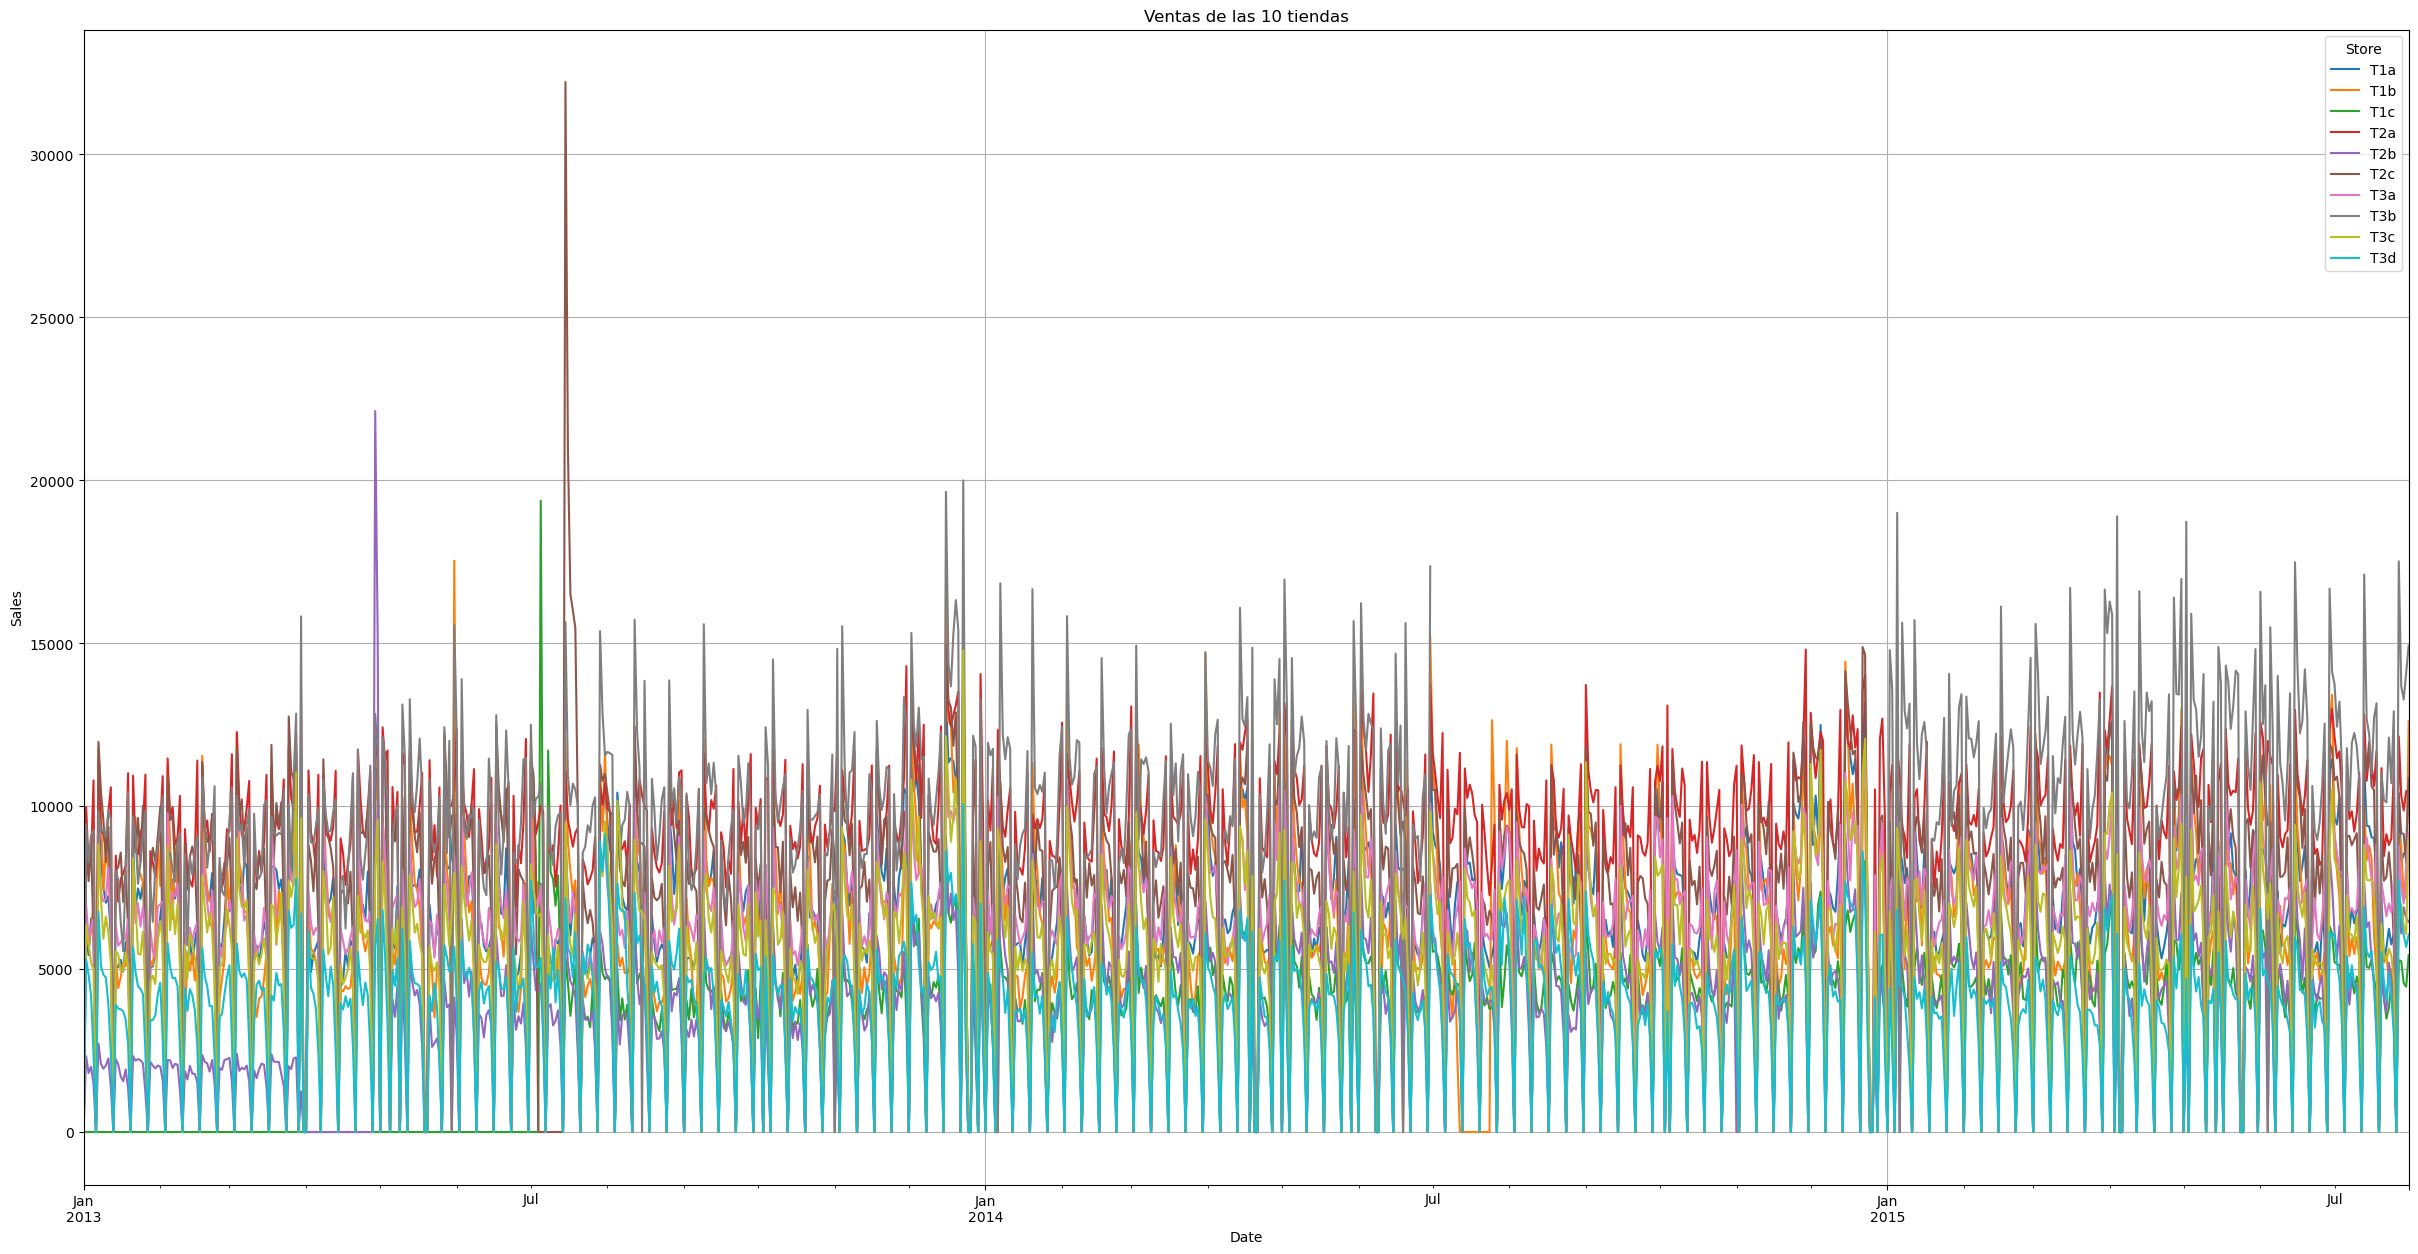

In [12]:
fig, ax = plt.subplots(figsize=(30,15))
datos_tiendas.plot(title="Ventas de las 10 tiendas",
                   grid=True,xlabel="Date", ylabel="Sales", ax=ax)

Debido al numero de tiendas resulta dificil de verla evolución de las ventas. Primero observaremos las tiendas por zonas y si es necesario de manera individual.

<AxesSubplot: title={'center': 'Ventas por tienda Zona 1'}, xlabel='Date', ylabel='Sales'>

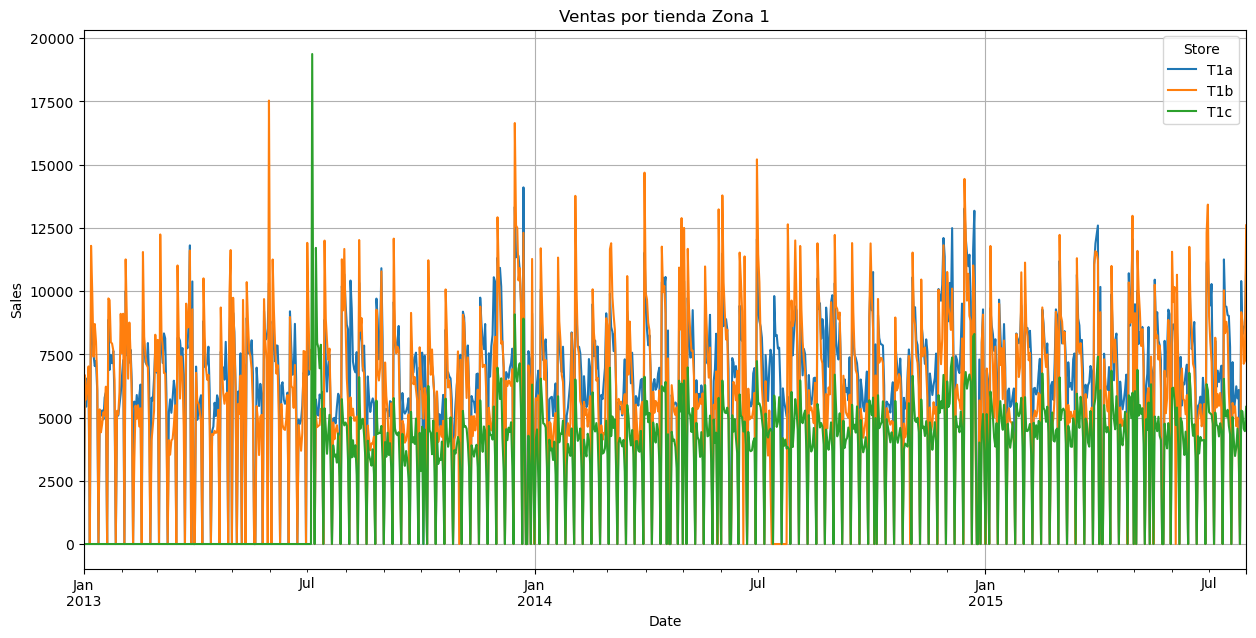

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
datos_tiendas[['T1a', 'T1b', 'T1c']].plot(title="Ventas por tienda Zona 1",
                   grid=True,xlabel="Date", ylabel="Sales", ax=ax)

<AxesSubplot: title={'center': 'Ventas por tienda Zona 2'}, xlabel='Date', ylabel='Sales'>

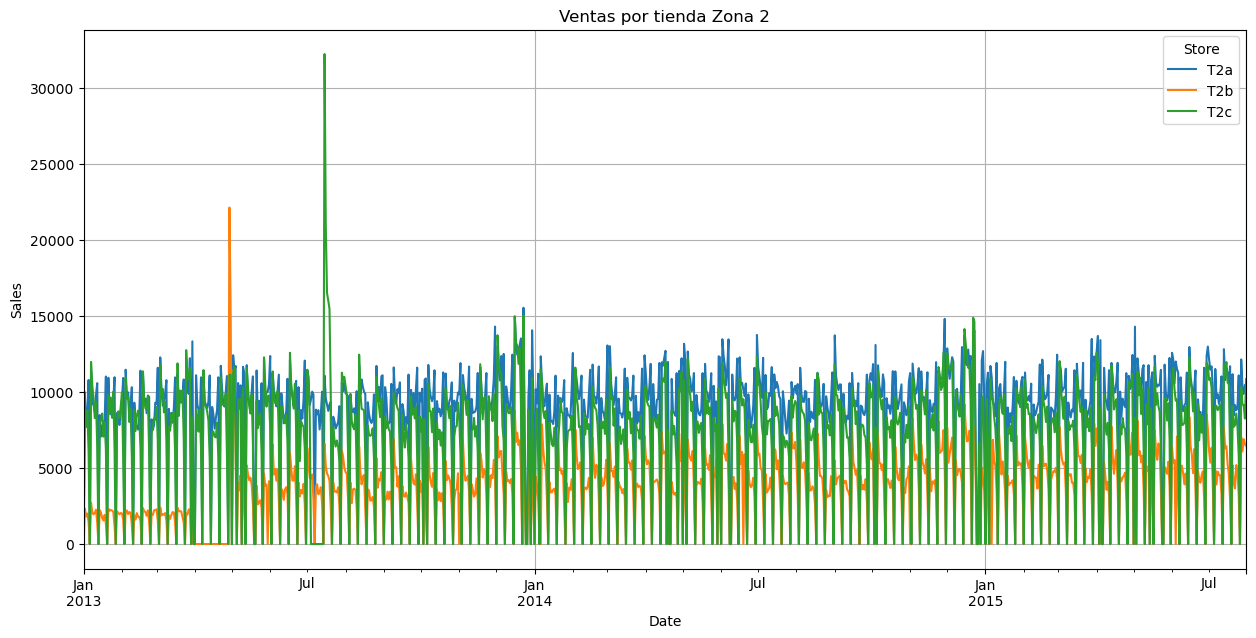

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
datos_tiendas[['T2a', 'T2b', 'T2c']].plot(title="Ventas por tienda Zona 2",
                   grid=True,xlabel="Date", ylabel="Sales", ax=ax)

<AxesSubplot: title={'center': 'Ventas por tienda Zona 3'}, xlabel='Date', ylabel='Sales'>

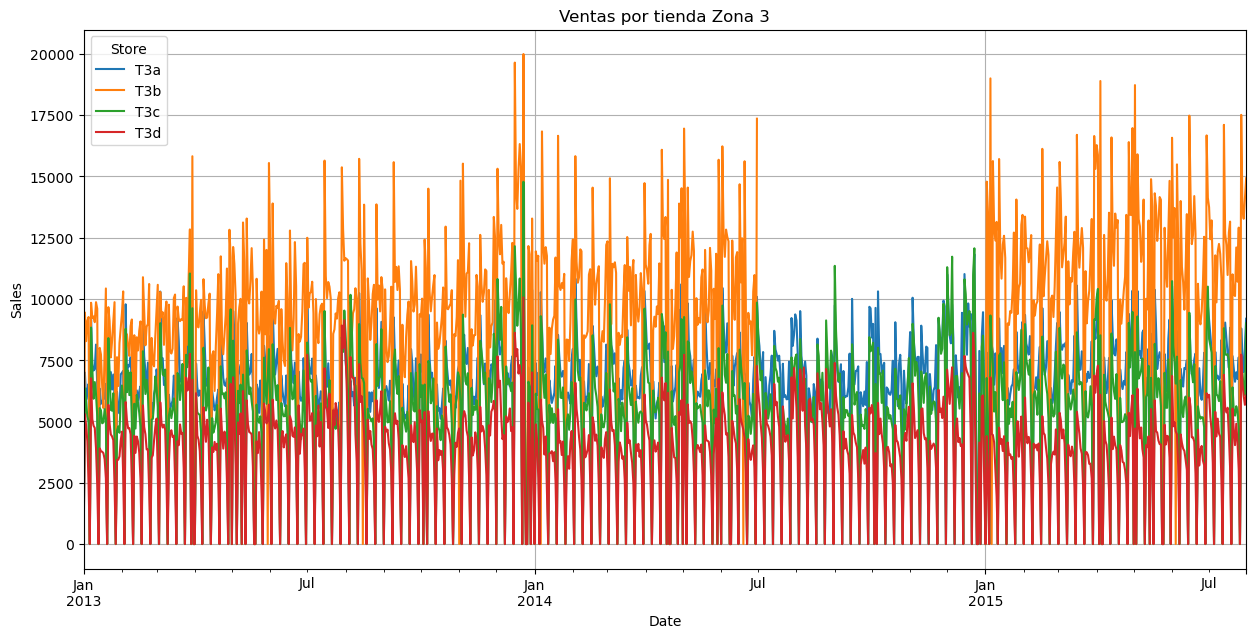

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
datos_tiendas[['T3a', 'T3b', 'T3c', 'T3d']].plot(title="Ventas por tienda Zona 3",
                   grid=True,xlabel="Date", ylabel="Sales", ax=ax)

Como es normal, observamos que en todas las tiendas, hay días en los que las ventas son 0, de ahí la dificultad para visualizar los datos. A pesar de ello y tras observar los datos de algunas tiendas podemos observar que es posible que exista estacionalidad en los datos. De hecho podemos observar al menos dos. Una que parece semanal (aunque debido a como estan graficados parace dificil de determinar) y otra anual (algo más clara). También es posible que exitan más estacionalidades o que estas no sean las correctas. Pero a priori y con esta visualización no podemos determinarlo con mayor precisión.

Con respecto a la tendencia, la observaremos más adelante, cuando veamos las ventas por tienda. Pero a priori ningna tienda tiene una tendecia muy marcada. 

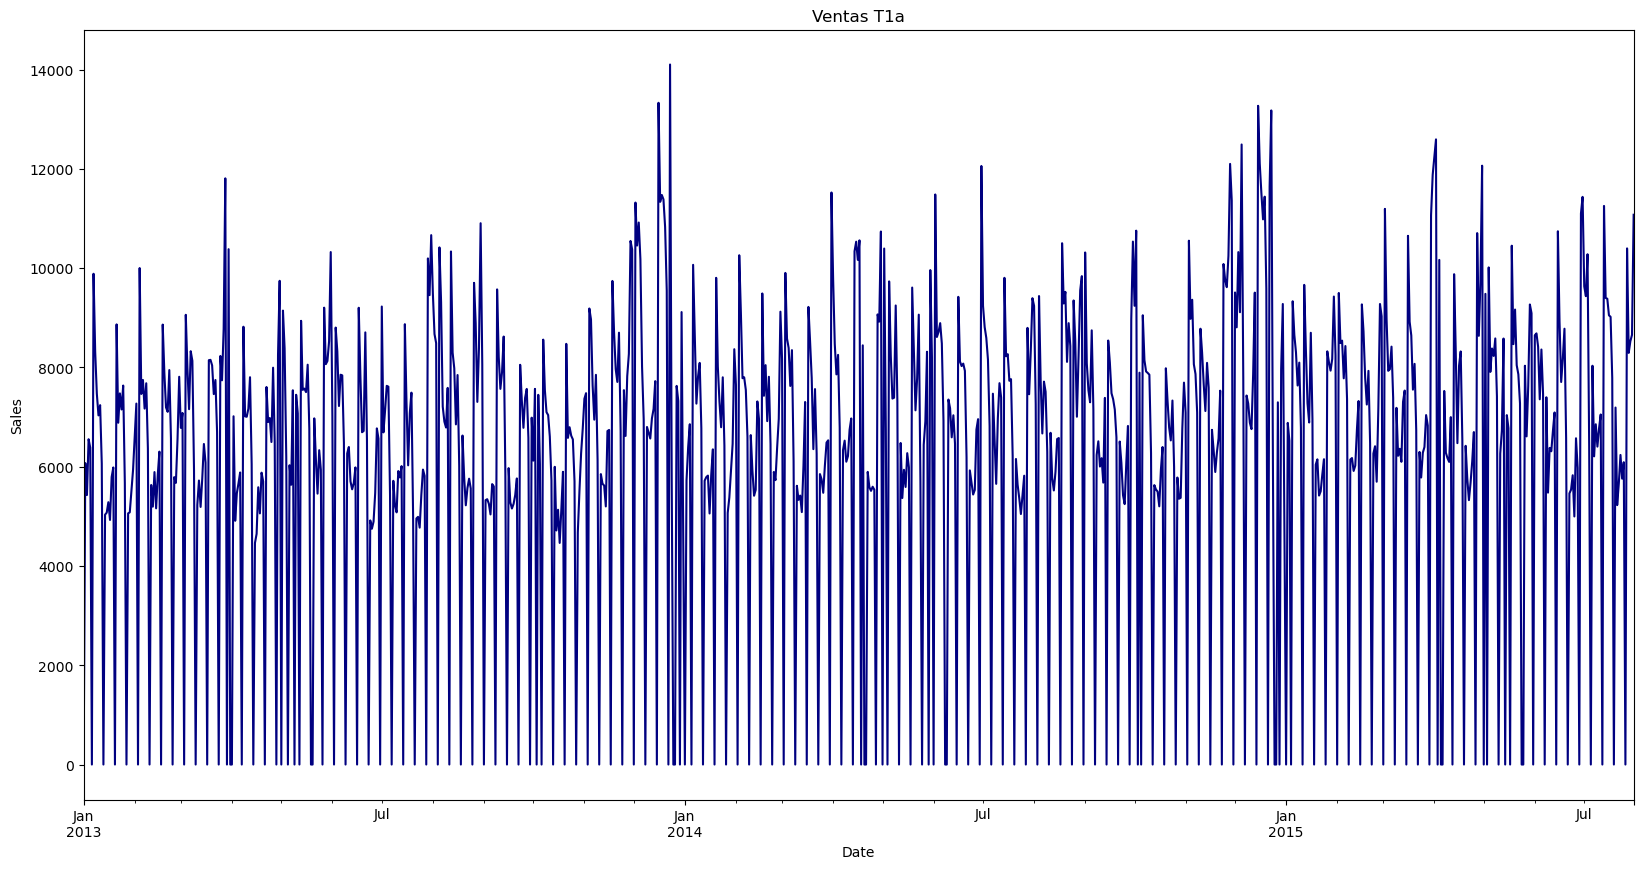

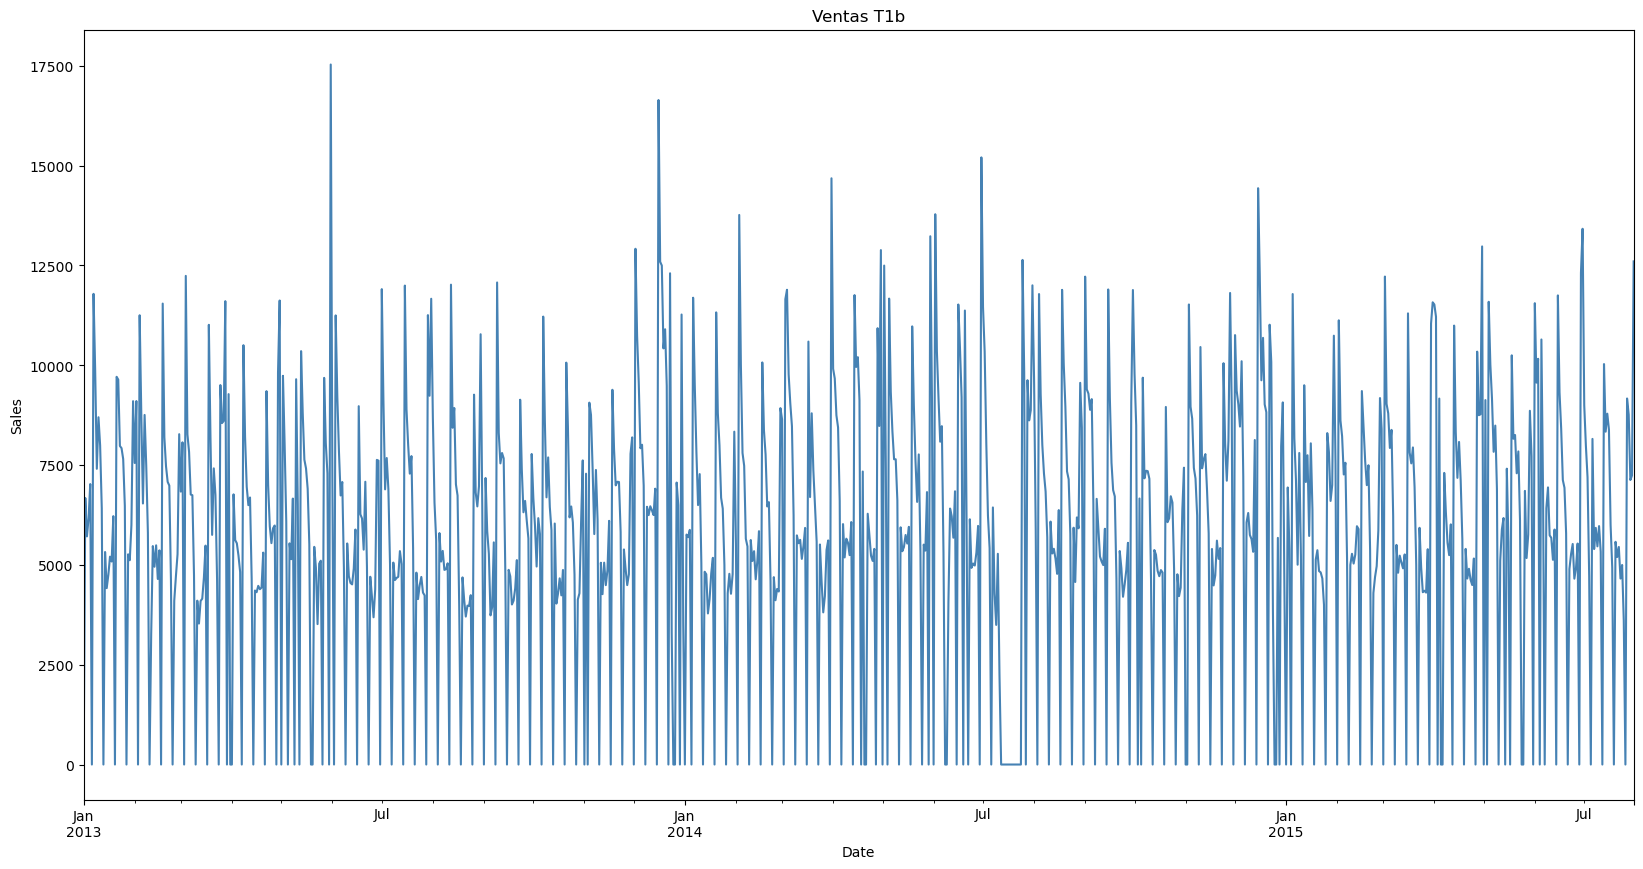

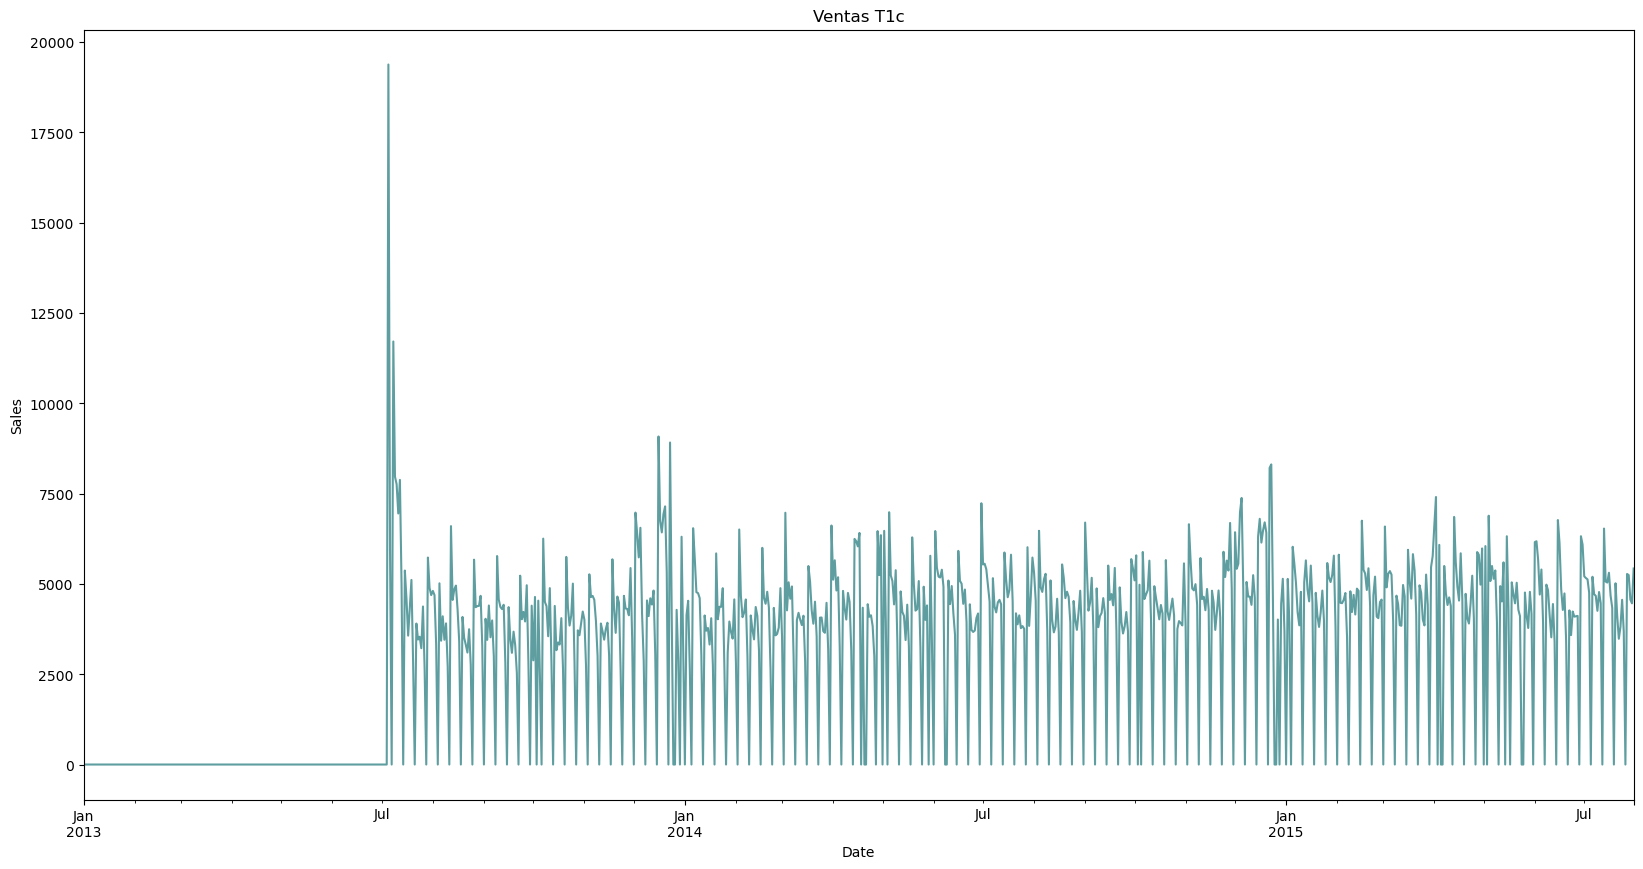

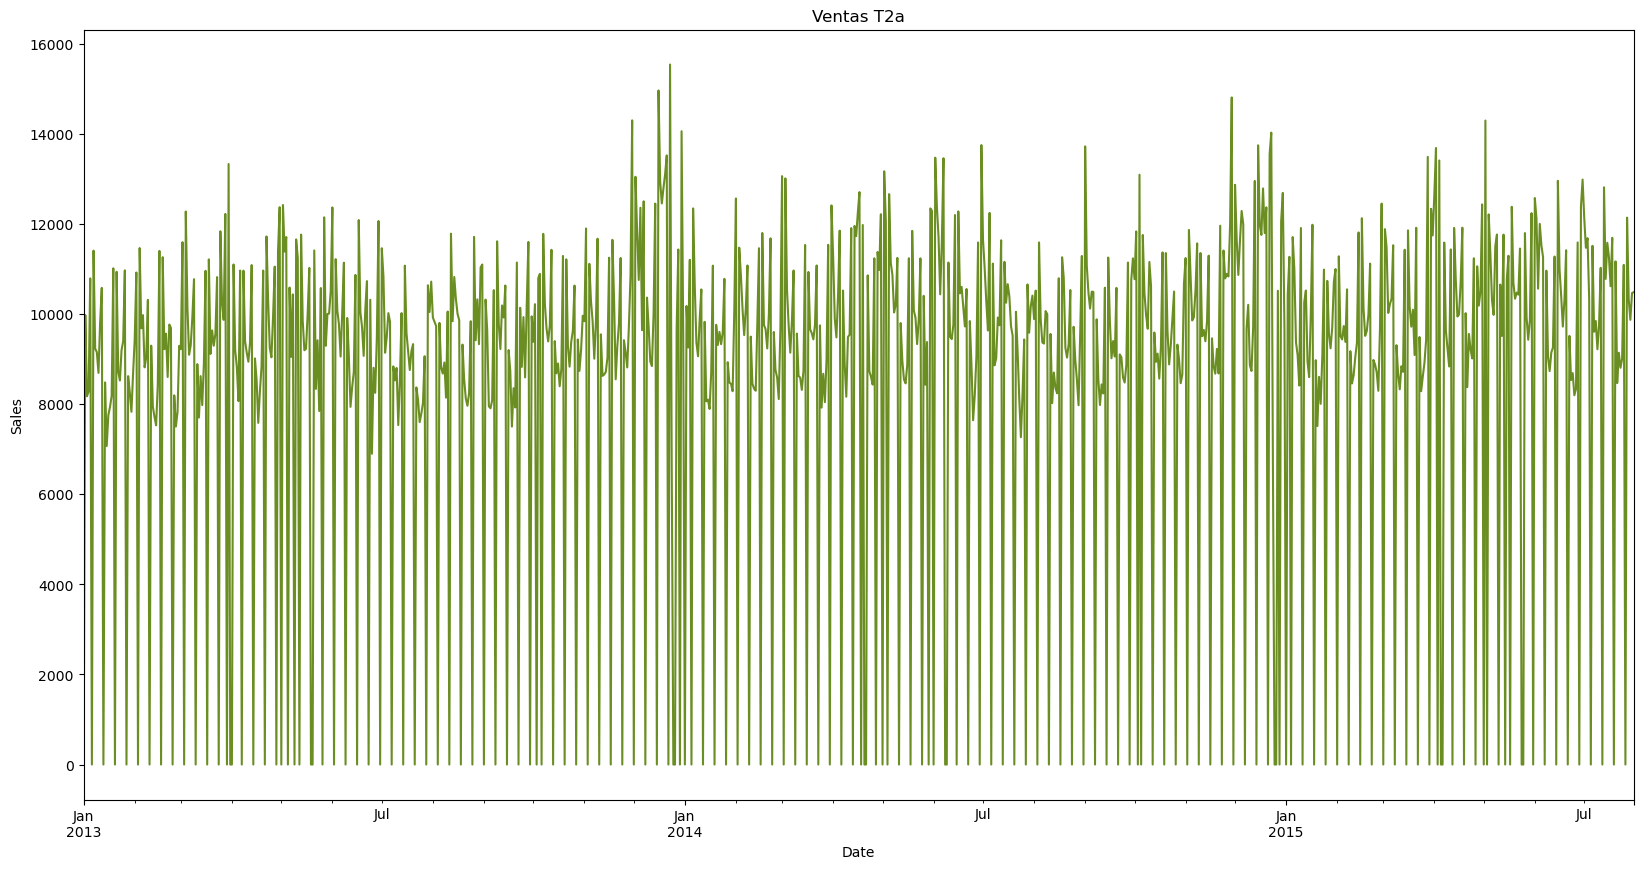

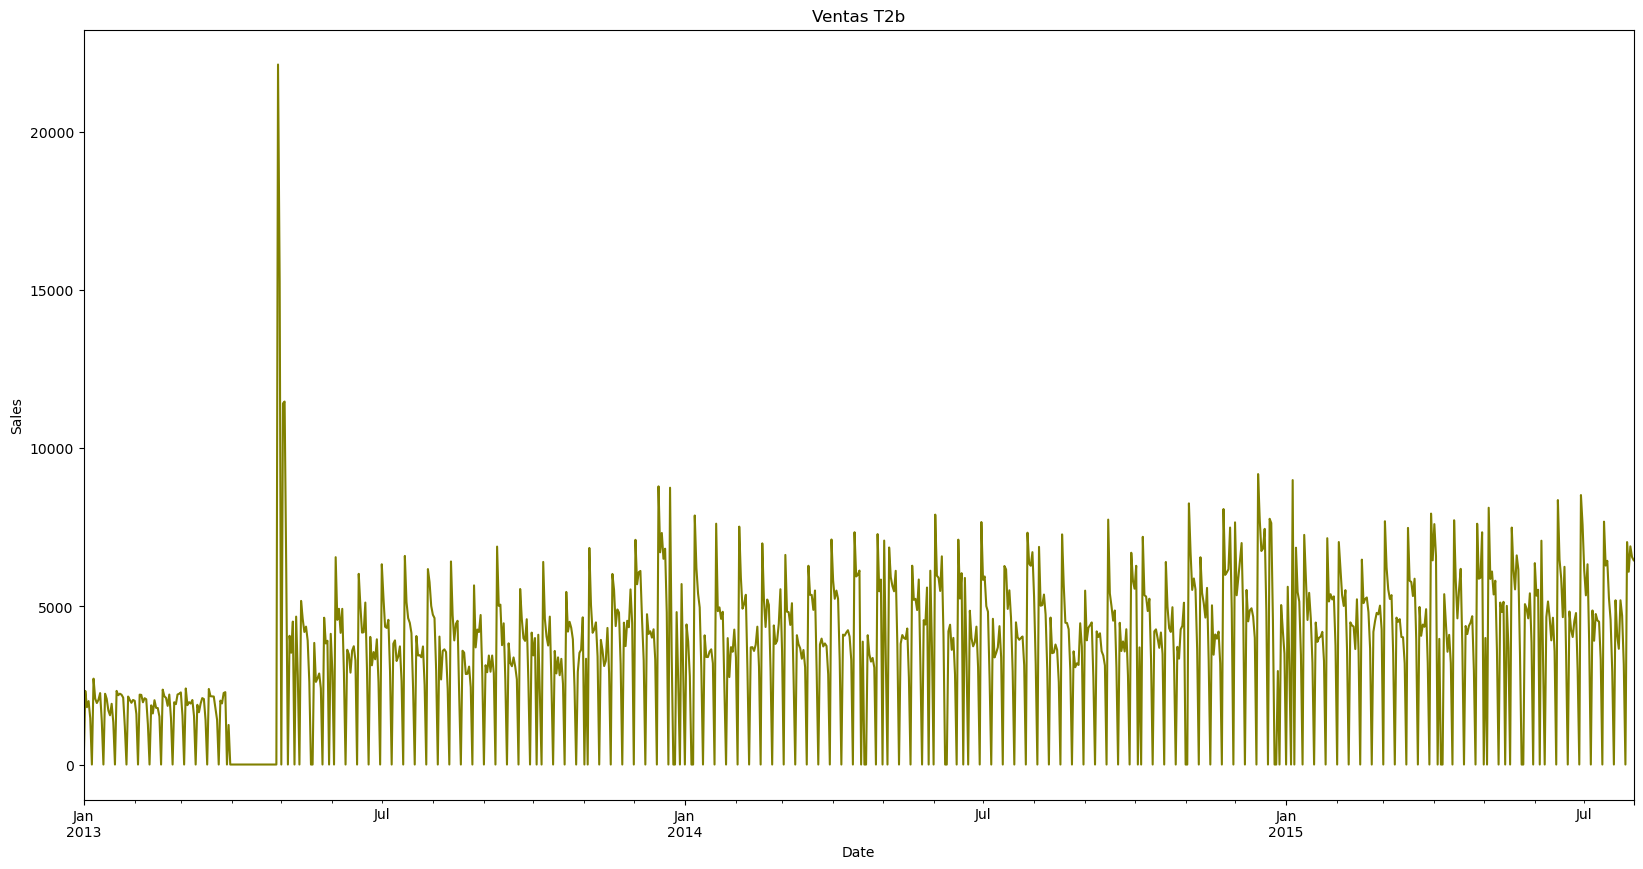

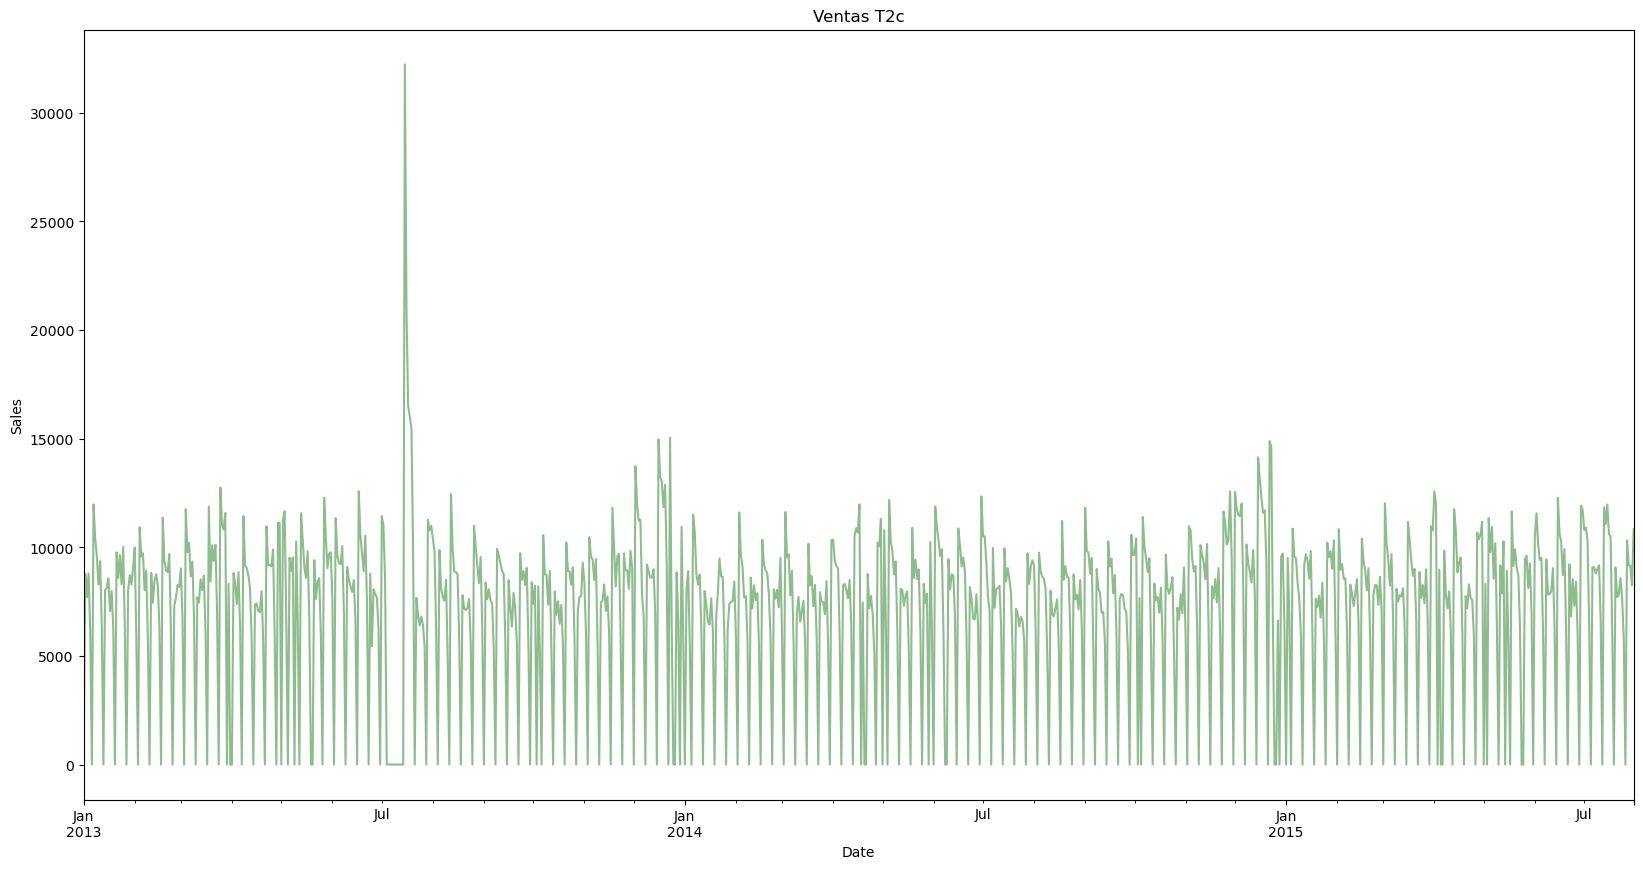

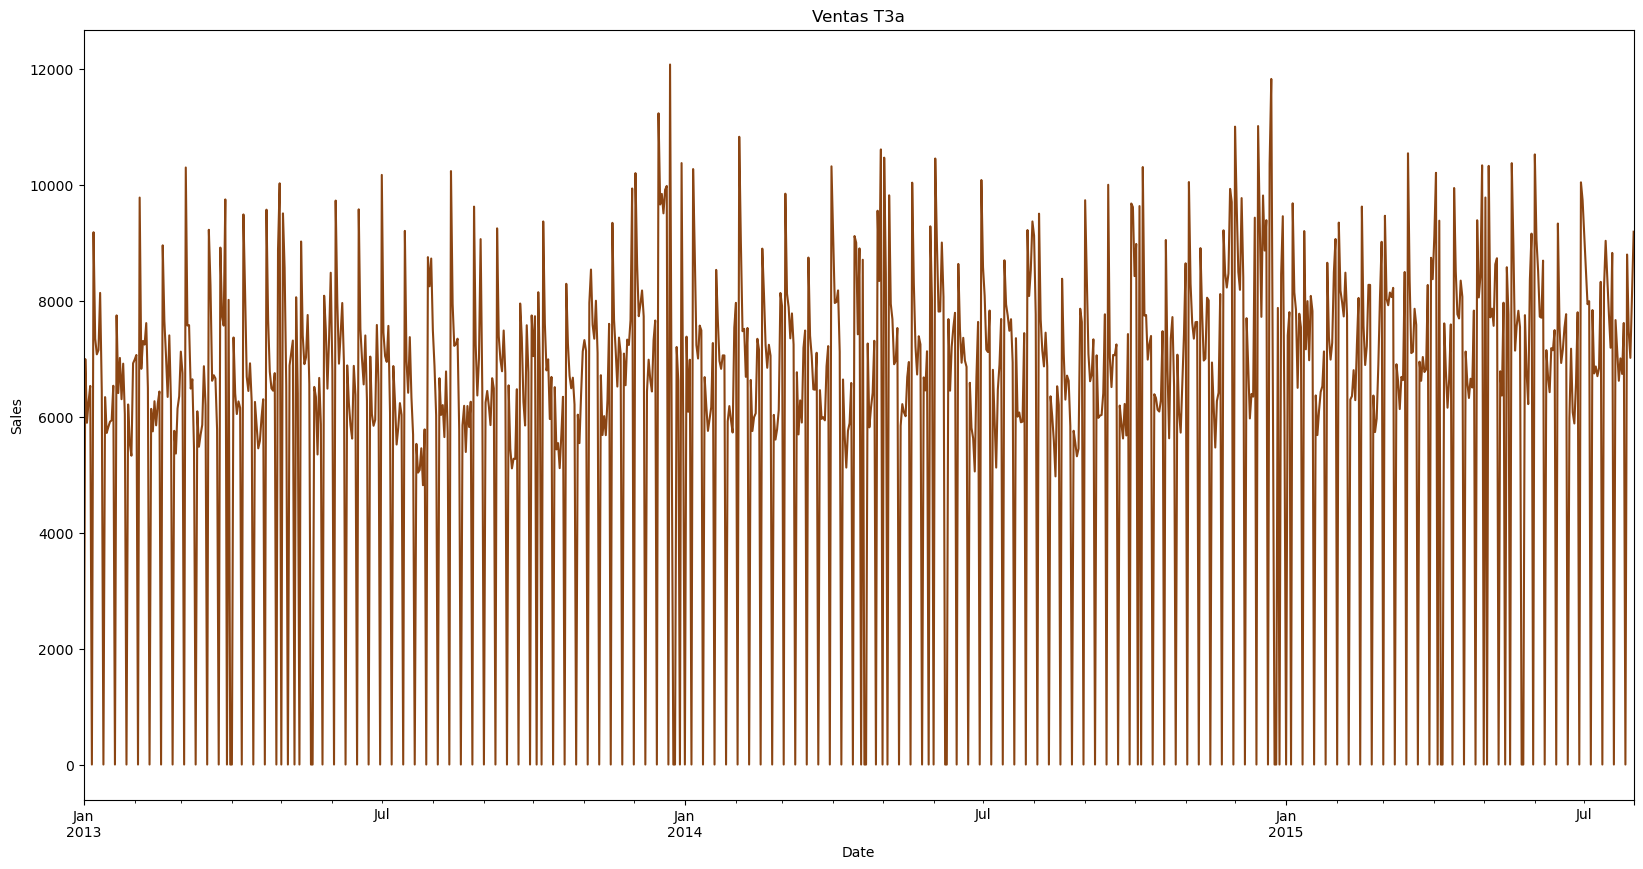

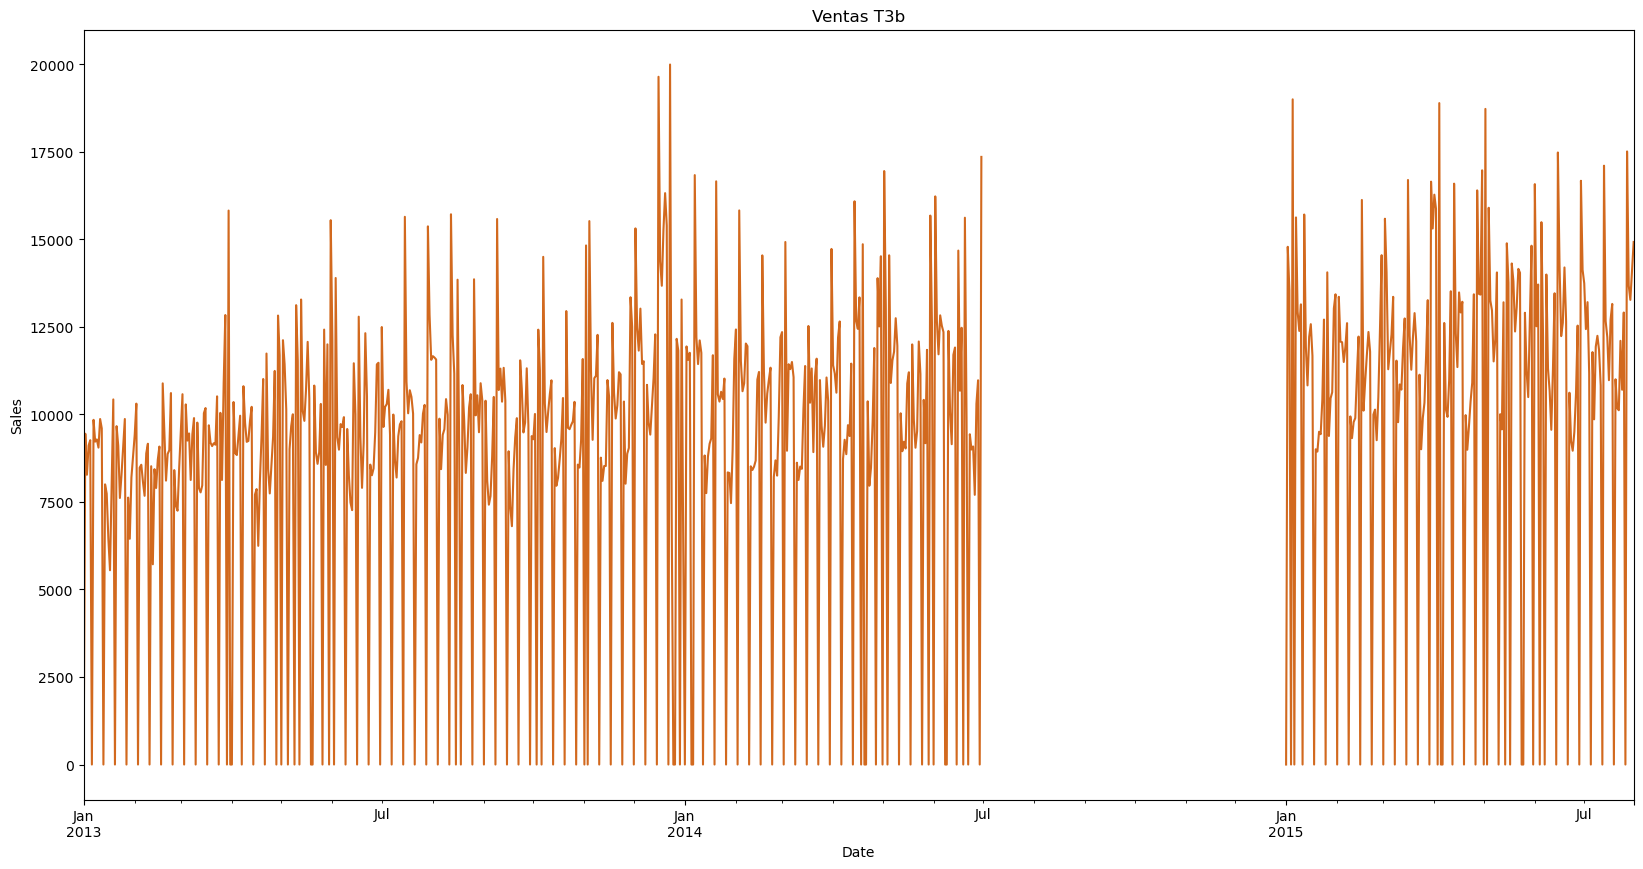

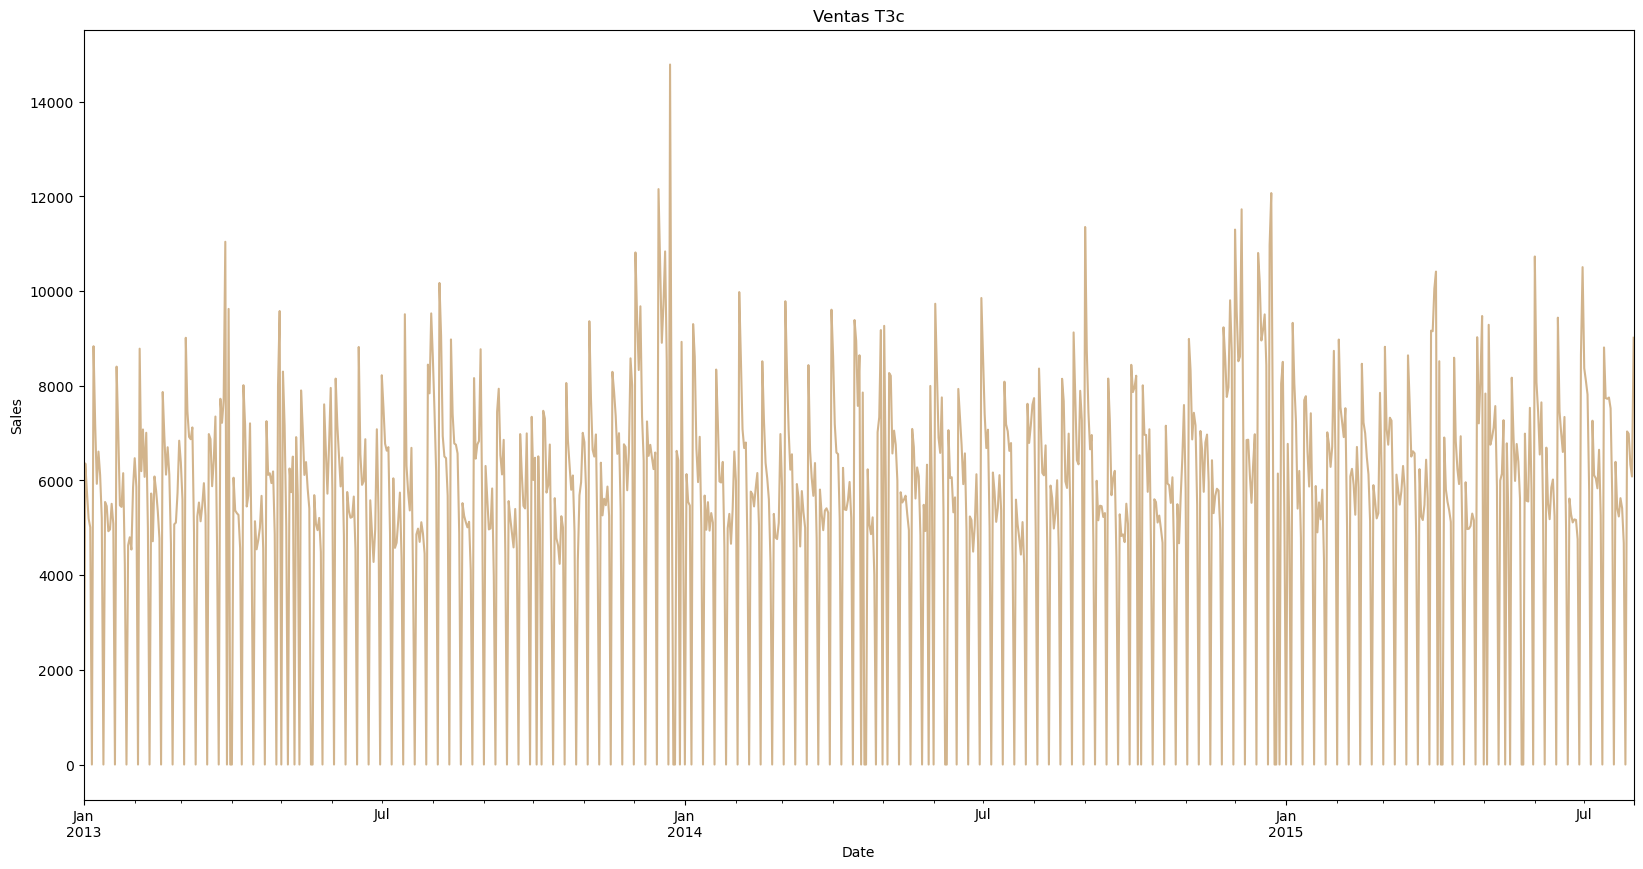

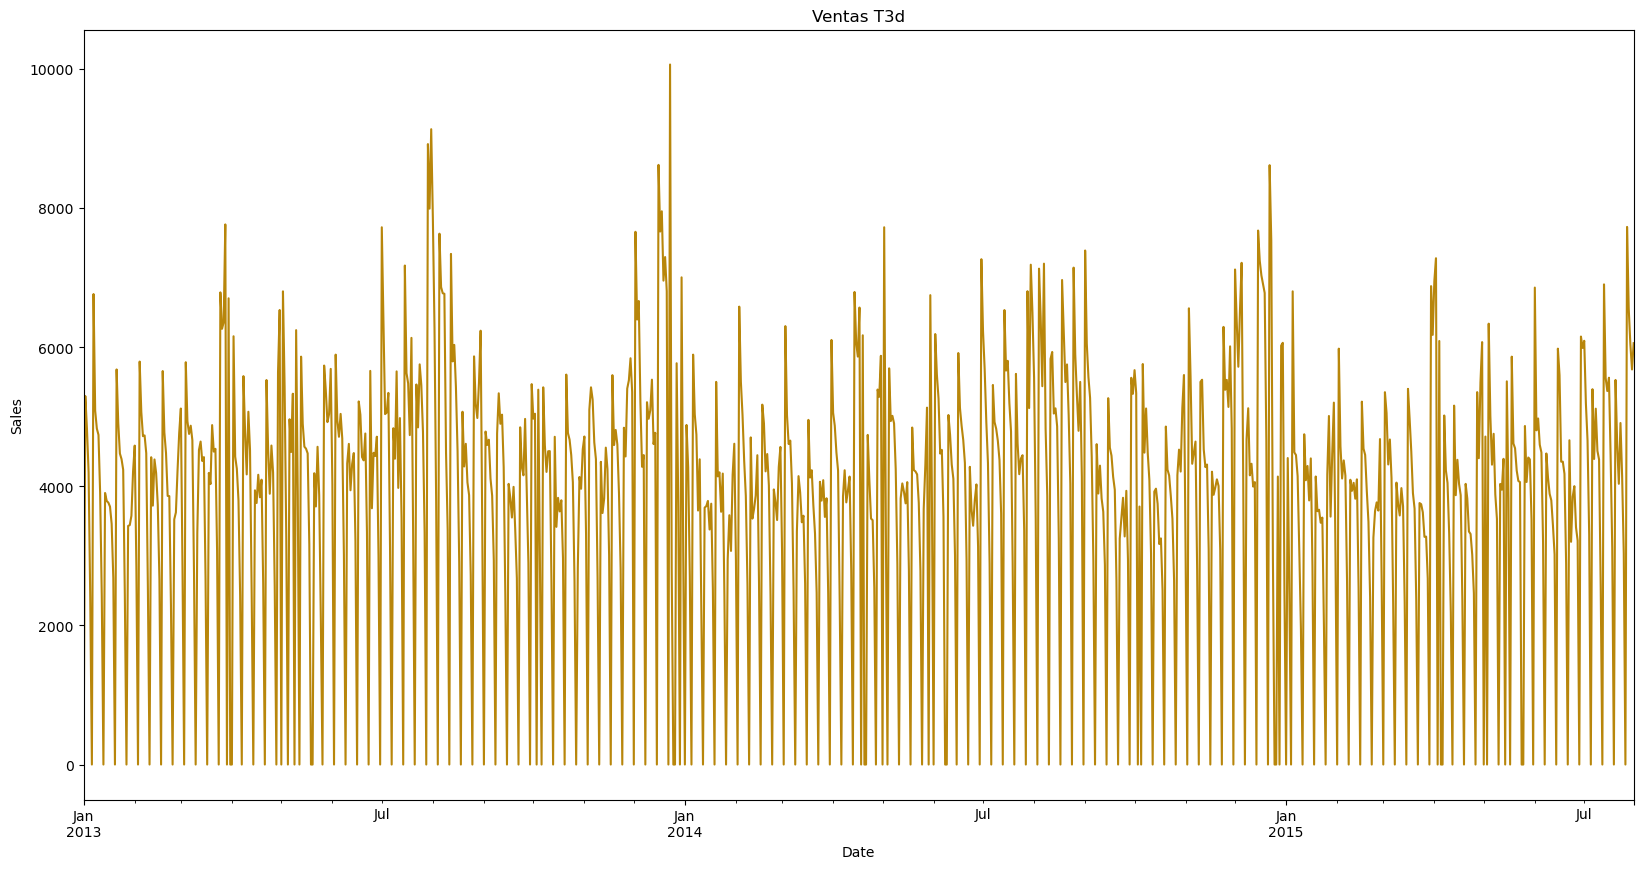

In [16]:
store = ['T1a', 'T1b', 'T1c', 'T2a', 'T2b', 'T2c', 'T3a', 'T3b', 'T3c', 'T3d']
colors = ['navy', 'steelblue', 'cadetblue', 'olivedrab', 'olive', 'darkseagreen',
          'saddlebrown','chocolate', 'tan', 'darkgoldenrod']

for i, s in enumerate(store):
    fig, ax = plt.subplots(figsize=(20,10))
    datos_tiendas[s].plot(title=("Ventas " + s), color=colors[i],
                          xlabel="Date", ylabel="Sales", ax=ax)

Ya no solo podemos observar que varios días del año las tiendas cierran, si no que también hay tiendas que han cerrado durante un periodo de tiempo. En estos casos, observamos que en el momento en el que abren las ventas aumentan hasta prácticamente máximos. Tanto los momentos de cierre, como los momentos de apertura son considerados outliers, especialmente estos últimos. Más adelante, trataremos con estos datos para realizar nuestra predicción.

###  <a name="4"> **Ventas diarias de las 3 zonas**</a>

En el caso de las ventas por zonas, en primer lugar crearemos una columna que sea por zona y utilizaremos un _pivot_table_ para sumar los valores de ventas diarias por zona y pivotar la tabla al mismo tiempo.

In [17]:
datos['zona'] = datos['Store'].str.slice(start=1, stop=2)
datos.head(3)

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                      
2013-01-01   T1a          2      0          0     0      0            a   
2013-01-01   T1b          2      0          0     0      0            a   
2013-01-01   T1c          2      0          0     0      0            a   

            SchoolHoliday zona  
Date                            
2013-01-01              1    1  
2013-01-01              1    1  
2013-01-01              1    1

In [18]:
datos_zonas = datos.pivot_table(values='Sales', index='Date', columns='zona', aggfunc='sum')
datos_zonas.head()

zona            1      2      3
Date                           
2013-01-01      0      0      0
2013-01-02  12748  21078  28100
2013-01-03  11143  17686  24759
2013-01-04  12727  19077  24774
2013-01-05  13406  18328  23204

<AxesSubplot: title={'center': 'Ventas de las 3 zonas'}, xlabel='Date', ylabel='Sales'>

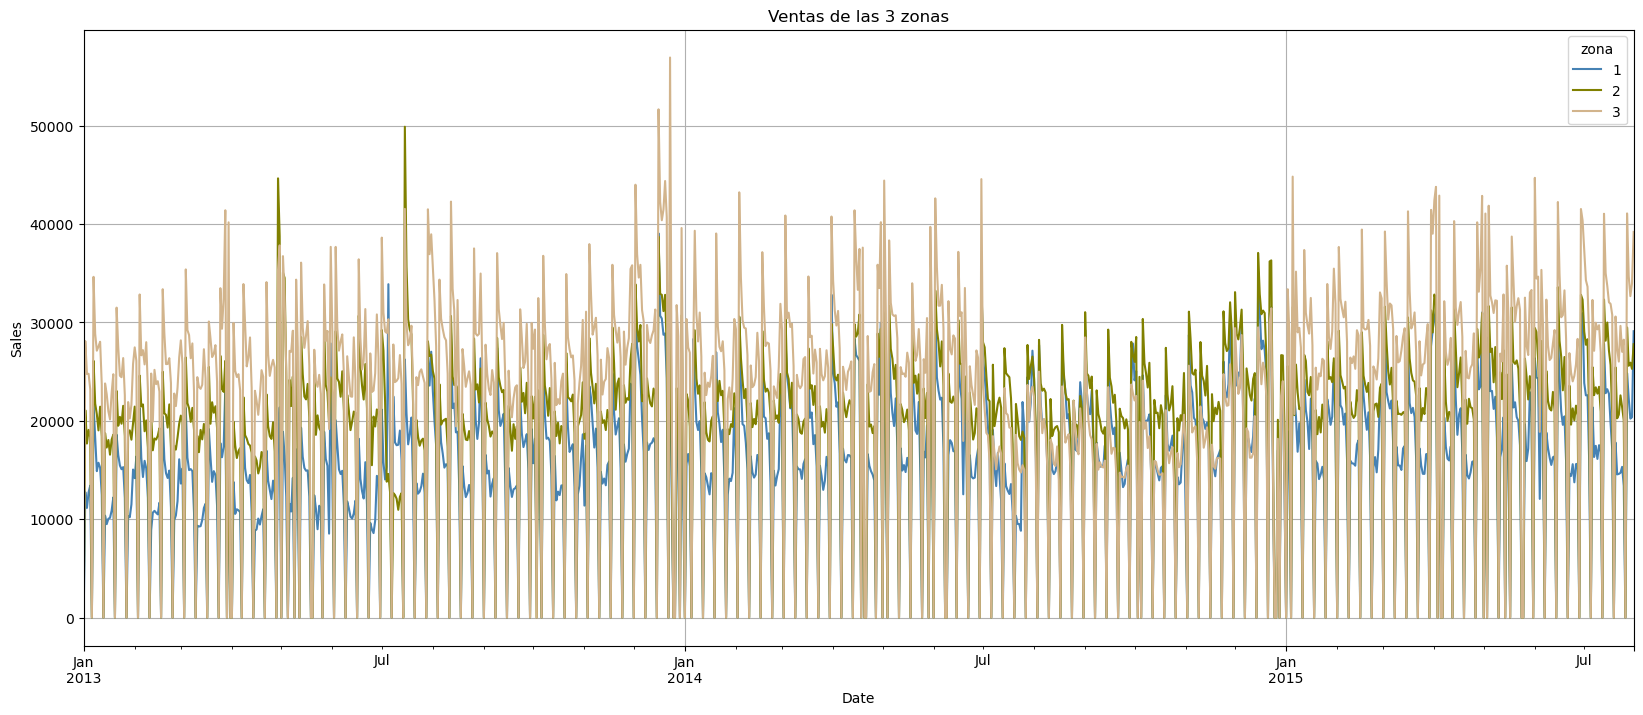

In [23]:
fig, ax = plt.subplots(figsize=(20,8))
datos_zonas.plot(title="Ventas de las 3 zonas",
                   grid=True,xlabel="Date", ylabel="Sales", 
                   color={'1':'steelblue', '2':'olive', '3':'tan'},
                   ax=ax)


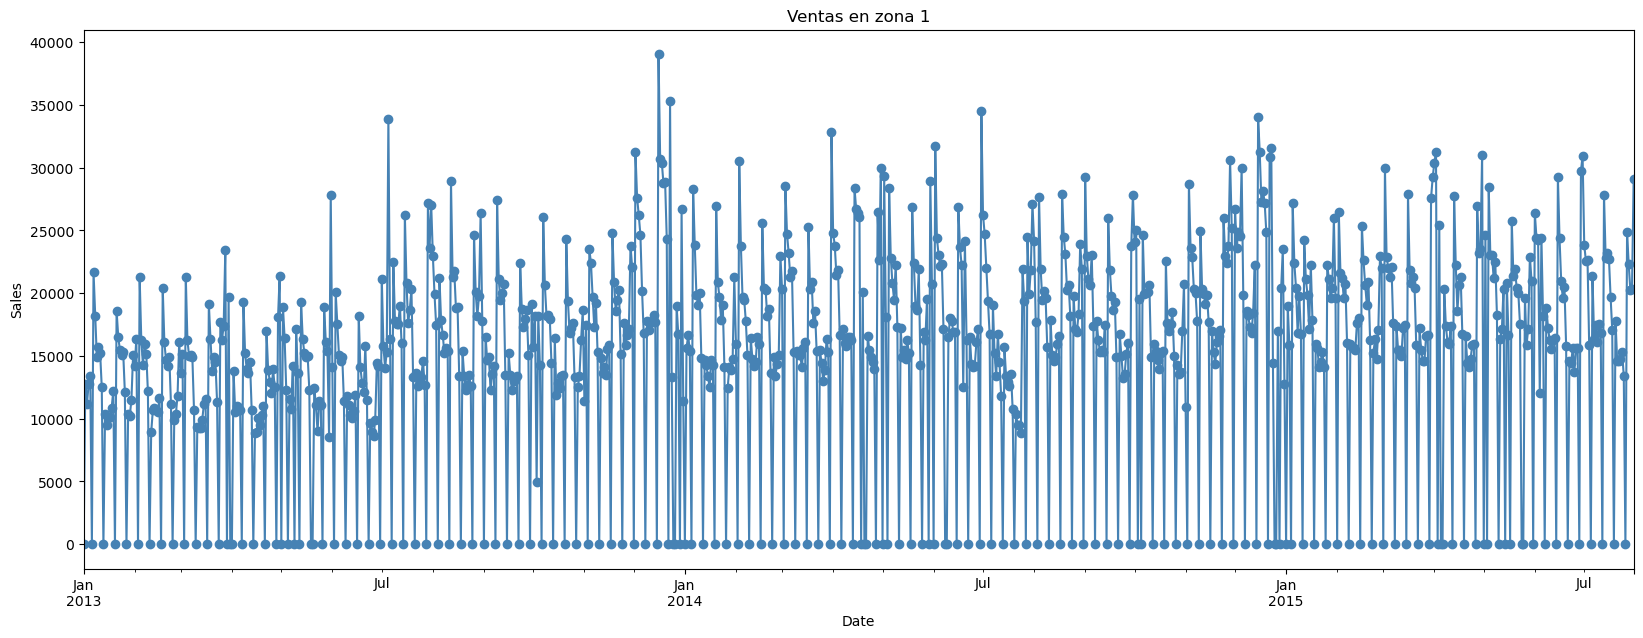

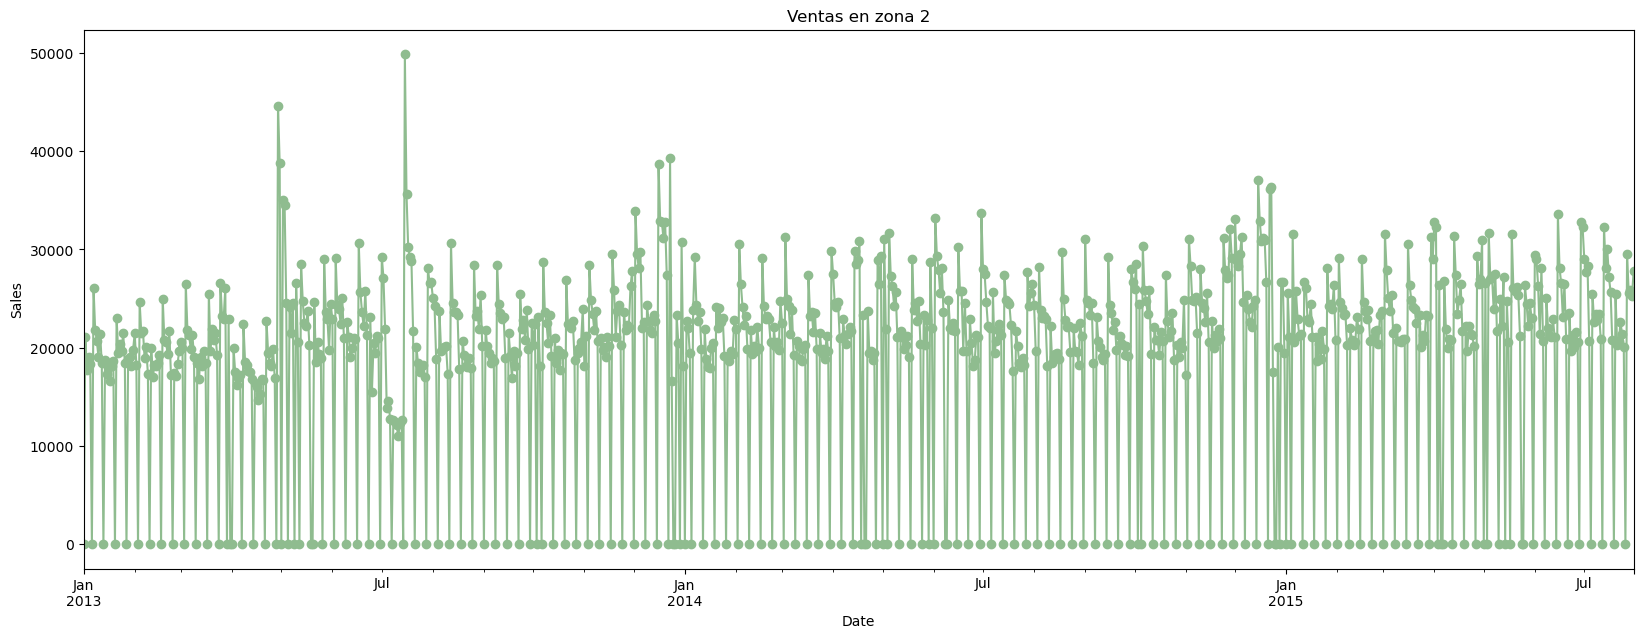

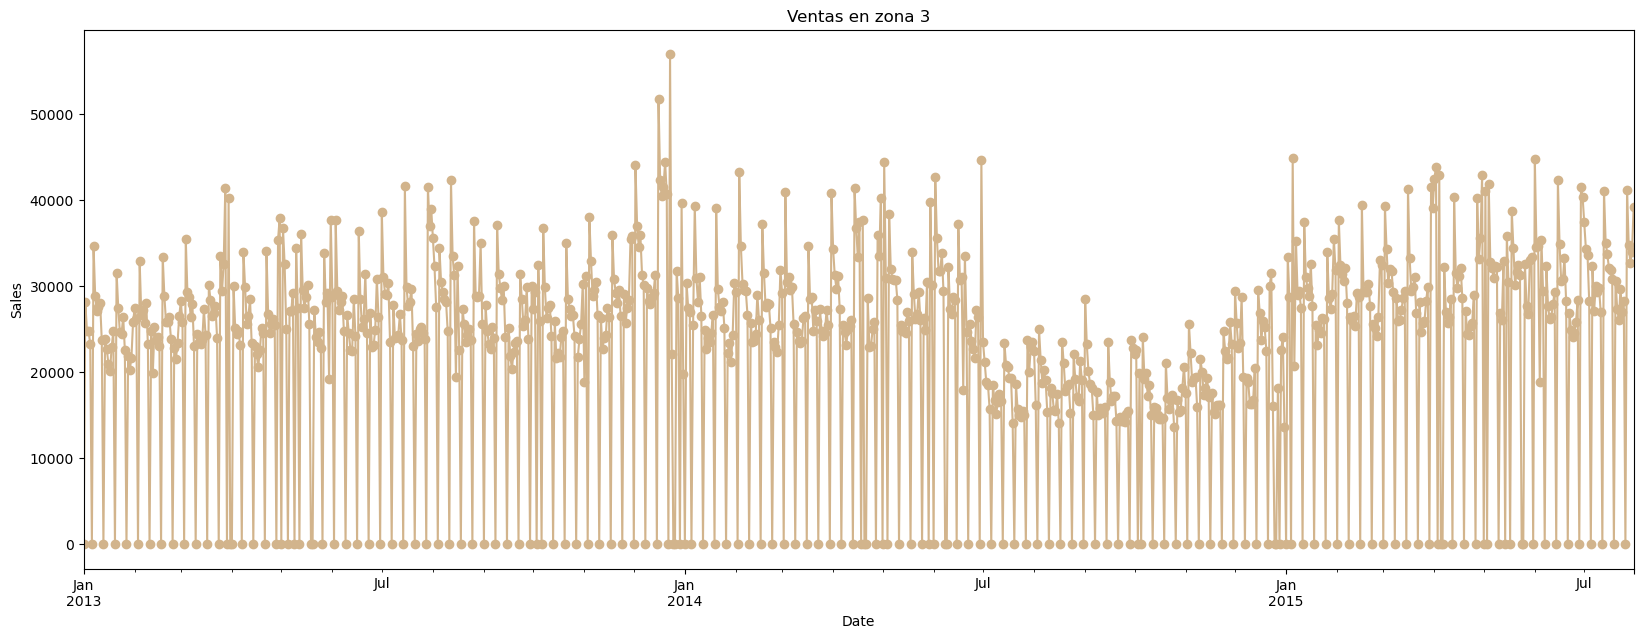

In [20]:
zone = ['1', '2', '3']
colors = ['steelblue', 'darkseagreen', 'tan']

for c, z in enumerate(zone):
    fig, ax = plt.subplots(figsize=(20,7))
    datos_zonas[z].plot(title=("Ventas en zona " + z), color = colors[c],
    xlabel="Date", ylabel="Sales", ax=ax)
    ax.scatter(datos_zonas[z].index, datos_zonas[z].values, marker='o', color=colors[c])

En los siguientes notebooks procederemos a graficar y predecir las ventas totales diarias y semanales, respectivamente. 